# WINE QUALITY EVALUATION - MACHINE LEARNING

#### Course Class ID: MALE431085E_23_1_04CLC

#### Lecturer: Quách Đình Hoàng

#### Group Implementation:

##### 20110420 - Nguyễn Huỳnh Thanh Toàn

##### 20110354 - Bùi Ngọc Ánh

##### 20110490 - Trần Thanh Huệ

#### Problem: Evaluating the quality of red wine

#### Implement solutions to solve problems:

**1. Import essential libraries to resolve the issue.**

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder      
from statistics import mean
import joblib 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

**2. Data preprocessing**

*- Load data*

In [2]:
# Load data
wine = pd.read_csv('./data.csv')

*- Quick view of the data*

In [3]:
# Quick view of the data
print('\n__________________ Dataset info __________________')
print(wine.info())


__________________ Dataset info __________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  10300 non-null  object 
 1   fixed acidity         10300 non-null  float64
 2   volatile acidity      10294 non-null  float64
 3   citric acid           10300 non-null  float64
 4   residual sugar        10297 non-null  float64
 5   chlorides             10300 non-null  float64
 6   free sulfur dioxide   10300 non-null  float64
 7   total sulfur dioxide  10300 non-null  float64
 8   density               10300 non-null  float64
 9   pH                    10300 non-null  float64
 10  sulphates             10297 non-null  float64
 11  alcohol               10300 non-null  float64
 12  quality               10300 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ MB
None


*- Check for duplicates in the dataset*

In [4]:
# Check for duplicates in the dataset
check = wine[wine.duplicated()]
check

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,red,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
27,red,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,red,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,red,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
76,red,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,red,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


*- Drop duplicates in the dataset*

In [5]:
# Drop duplicates in the dataset
wine = wine.drop_duplicates()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10065 entries, 0 to 10299
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  10065 non-null  object 
 1   fixed acidity         10065 non-null  float64
 2   volatile acidity      10059 non-null  float64
 3   citric acid           10065 non-null  float64
 4   residual sugar        10062 non-null  float64
 5   chlorides             10065 non-null  float64
 6   free sulfur dioxide   10065 non-null  float64
 7   total sulfur dioxide  10065 non-null  float64
 8   density               10065 non-null  float64
 9   pH                    10065 non-null  float64
 10  sulphates             10062 non-null  float64
 11  alcohol               10065 non-null  float64
 12  quality               10065 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.1+ MB


***=> There are many missing features such as: volatile acidity, residual sugar, sulphates. Most data has the data type float, except for feature type which has data type string and feature quality which has data type int. Data requires 1.1+ MB of memory.***


In [6]:
# Print the first 3 lines of data
print('\n____________ Some first data examples ____________')
print(wine.head(3))


____________ Some first data examples ____________
  type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  


*- Check for quality of data*

In [7]:
# Check for quality of data
print(wine['quality'].value_counts()) 

quality
5    2056
6    1951
7    1664
8    1515
4    1441
3    1438
Name: count, dtype: int64


In [8]:
wine.shape
# The data has 10065 samples and 13 features
print("Number of samples: ", wine.shape[0])
print("Number of features: ", wine.shape[1])

Number of samples:  10065
Number of features:  13


***=> The data has 10065 samples and 13 features***

*- Check for NULL in datase*

In [9]:
# Check for NULL in dataset
wine.isna().sum()

type                    0
fixed acidity           0
volatile acidity        6
citric acid             0
residual sugar          3
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               3
alcohol                 0
quality                 0
dtype: int64

*- Missing Value Handling(Fill Null data with mean value of each feature ('volatile acidity','residual sugar','sulphates'))*

In [10]:
# Missing Value Handling
# Fill Null data with mean value of each feature ('volatile acidity','residual sugar','sulphates')
# Replace the missing the values with the column mean
missing_val_cols = ['volatile acidity','residual sugar','sulphates']
for col in missing_val_cols:
    mean = wine[col].mean()
    wine[col].fillna(mean, inplace=True)

*- Check again for Null value*

In [11]:
# Check again for Null value
wine.isna().sum()
# Null value has been filled

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*- Statistics of numeric features*

In [12]:
# Statistics dataset
print('\n_______________ Statistics of numeric features _______________')
print(wine.describe())   


_______________ Statistics of numeric features _______________
       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   10065.000000      10065.000000  10065.000000    10065.000000   
mean        7.212421          0.591940      0.383709        5.022149   
std         1.196947          0.230793      0.229825        2.673552   
min         0.102400          0.001400      0.000000        0.009900   
25%         6.540000          0.400000      0.190000        2.514300   
50%         7.100000          0.580000      0.370000        4.770000   
75%         7.630000          0.780000      0.580000        7.310000   
max        15.900000          1.580000      1.000000       15.500000   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  10065.000000         10065.000000          10065.000000  10065.000000   
mean       0.078259            17.763636             92.041862      0.997406   
std        0.025606             8.568943       

In [13]:
# Data features
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

*- Scatter plot between 2 features density and quality (scatter_1_density_and_quality.png)*

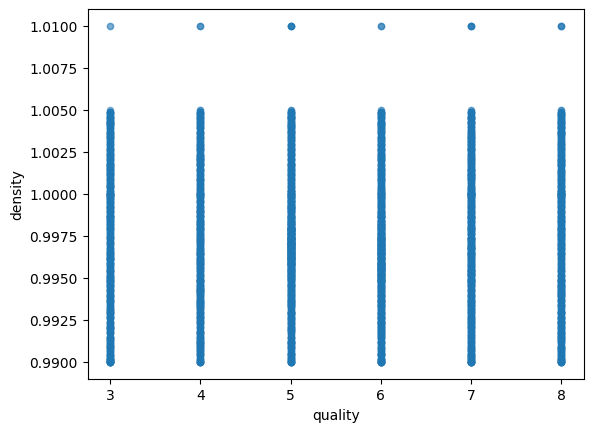

In [14]:
# Scatter plot between 2 features density and quality (scatter_1_density_and_quality.png)
wine.plot(kind="scatter", y="density", x="quality", alpha=0.2)
plt.savefig('figure/scatter_1_density_and_quality.png', format='png', dpi=300)
plt.show()

*- Citric acid vs quality*

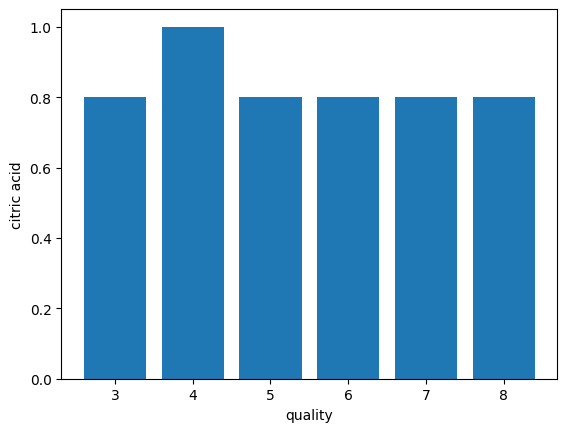

In [15]:
# Citric acid vs quality
plt.bar(wine['quality'],wine['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

*- Plot histogram of features (histogram_1_numerical_columns.png)*

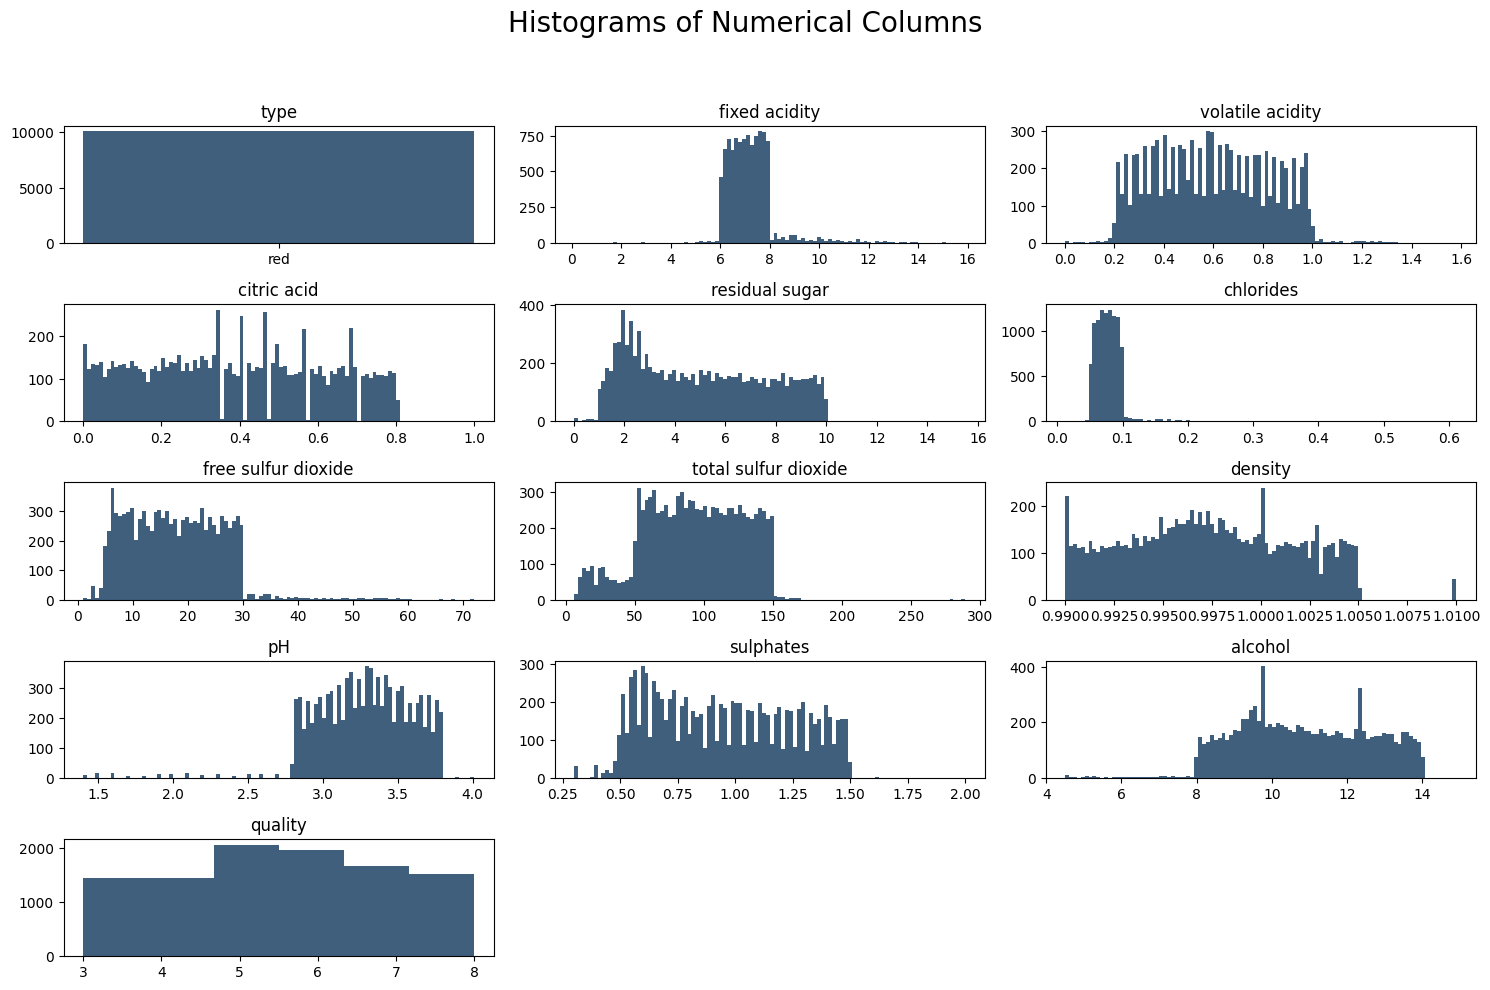

In [16]:
# Plot histogram of features (histogram_1_numerical_columns.png)
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(wine.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(wine.columns.values[i])

    vals = np.size(wine.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(wine.iloc[:, i], bins=vals, color='#3F5F7D')
plt.savefig('figure/histogram_1_numerical_columns.png', format='png', dpi=300)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

*- Plot histogram of numeric features (histogram_2_raw_data.png)*

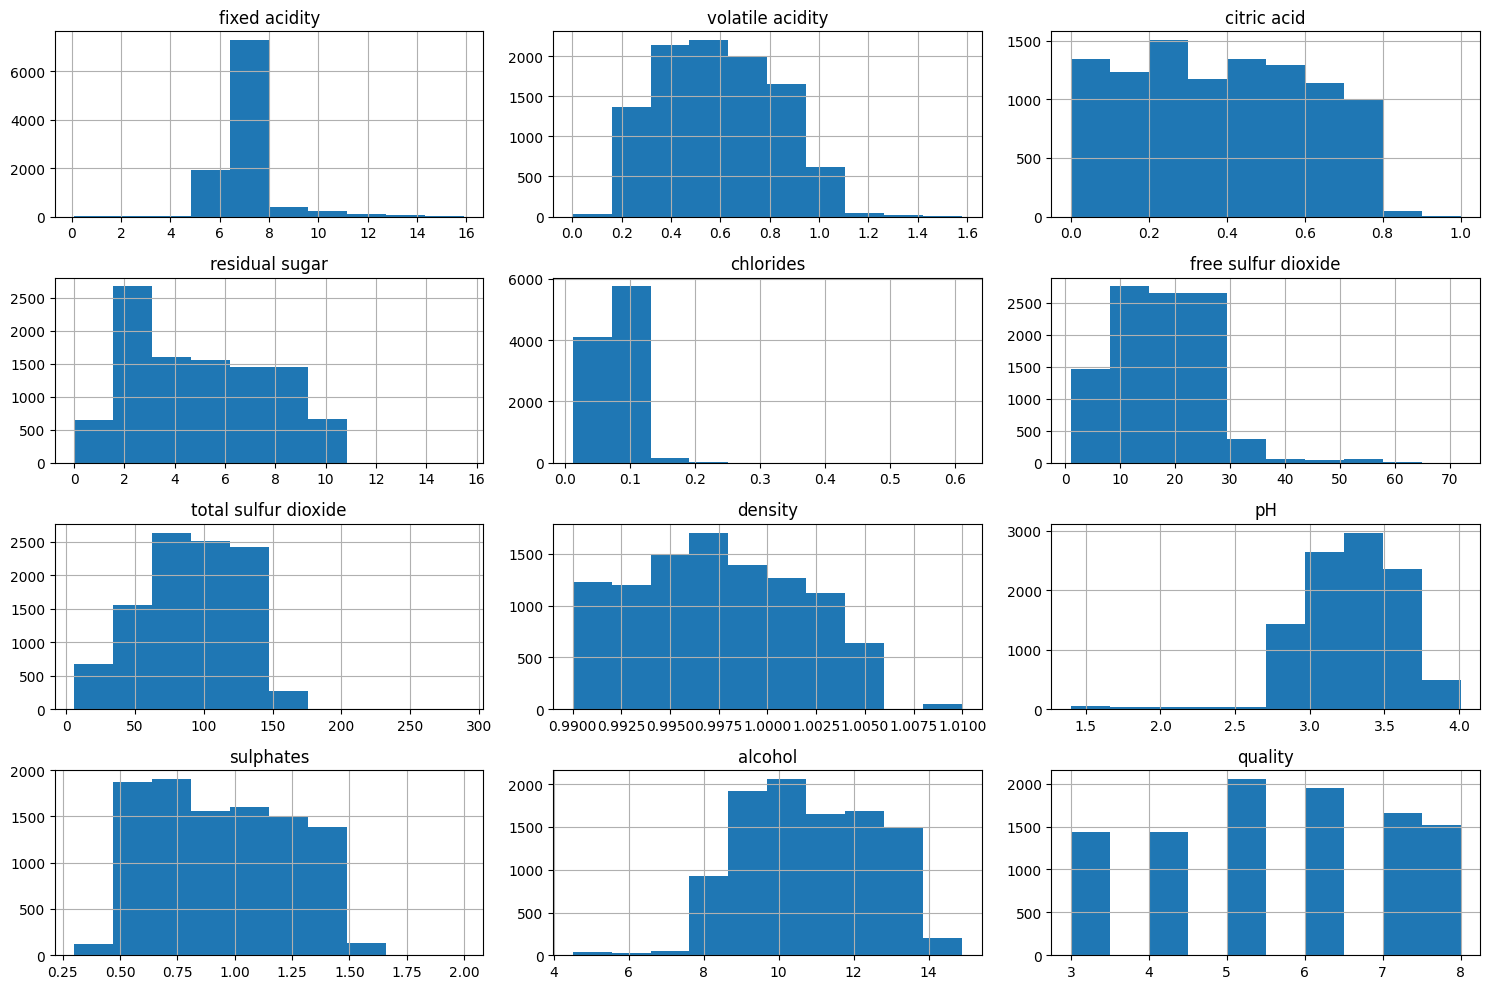

In [17]:
# Plot histogram of numeric features (histogram_2_raw_data.png)
wine.hist(figsize=(15,10)) # bins: no. of intervals
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.tight_layout()
plt.savefig('figure/histogram_2_raw_data.png', format='png', dpi=300) # must save before show()
plt.show()

*- Drop feature type to reduce data noise*

In [18]:
# Drop feature type to reduce data noise
wine.drop(columns='type',inplace = True)

*- Compute correlations between features*

In [19]:
# Compute correlations between features
corr_matrix = wine.corr()
# print correlation matrix
print(corr_matrix) 
print('\n',corr_matrix["quality"].sort_values(ascending=False))

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.074812     0.043801   
volatile acidity          -0.074812          1.000000    -0.007128   
citric acid                0.043801         -0.007128     1.000000   
residual sugar            -0.141025          0.022788     0.081058   
chlorides                  0.161673          0.031350     0.025378   
free sulfur dioxide       -0.049482          0.021717     0.015696   
total sulfur dioxide      -0.208723          0.067791     0.093689   
density                    0.036411         -0.001588     0.024880   
pH                        -0.109815         -0.027264    -0.035505   
sulphates                 -0.137388          0.025209     0.095697   
alcohol                   -0.068880         -0.006815     0.030476   
quality                    0.003879         -0.028866     0.010503   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

*- Correlation with quality with respect to attributes*

<Axes: title={'center': 'Correlation with quality'}>

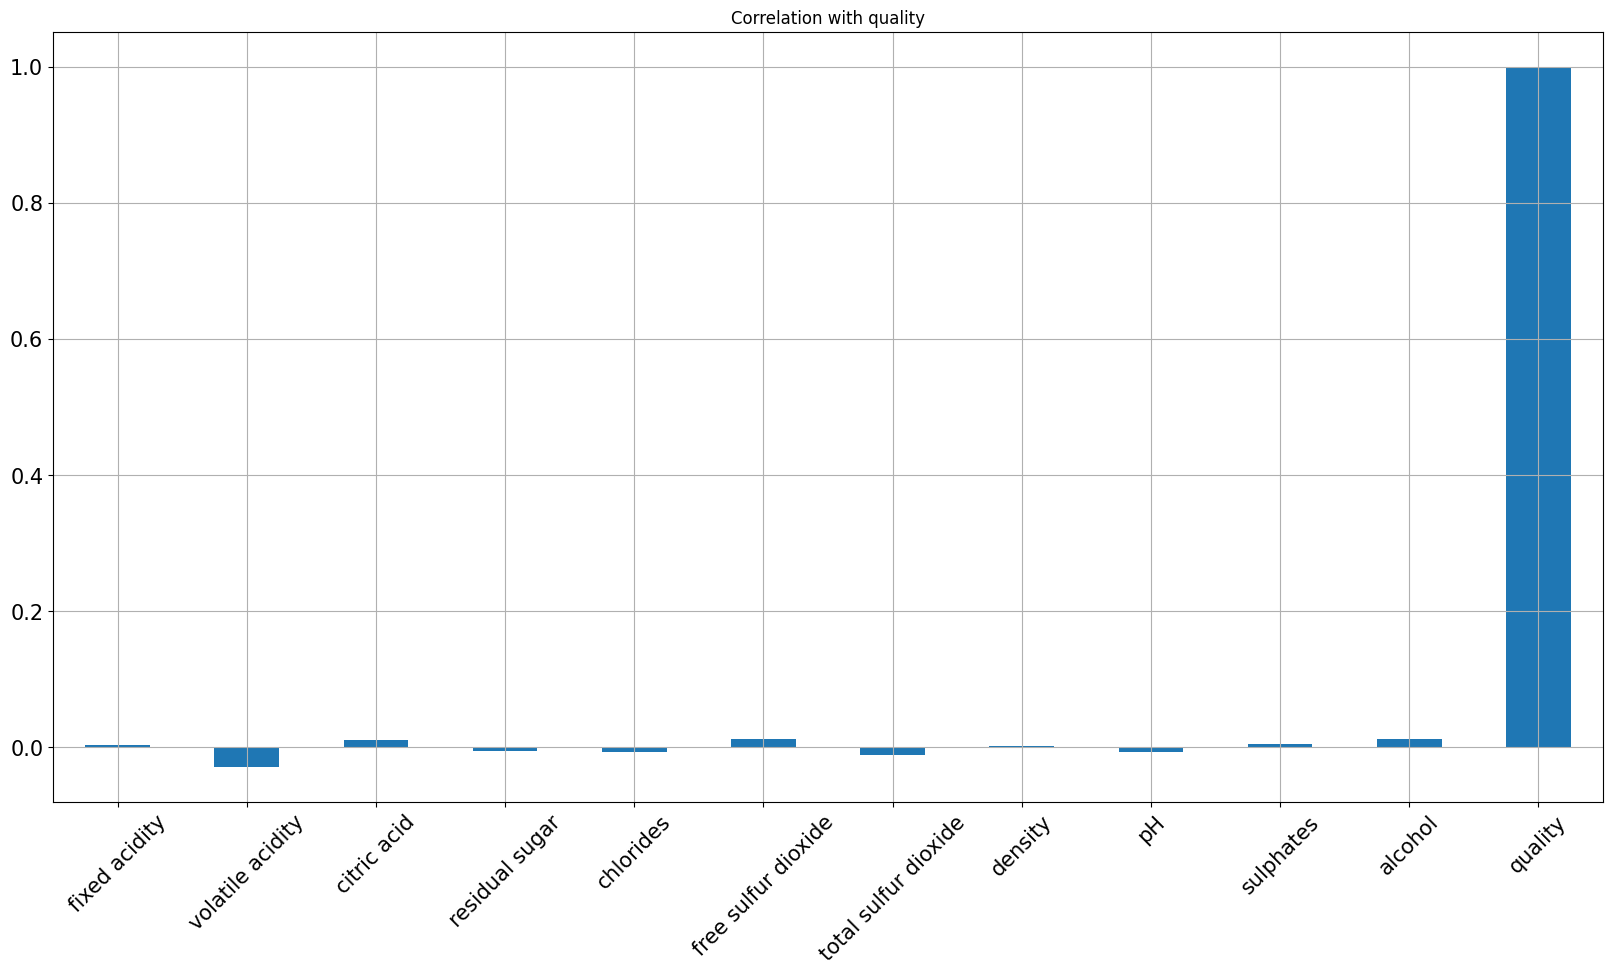

In [20]:
# Correlation with quality with respect to attributes
wine.corrwith(wine.quality).plot.bar(
    figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
    rot = 45, grid = True)

*- Check if we need to do Dimensionality reduction*

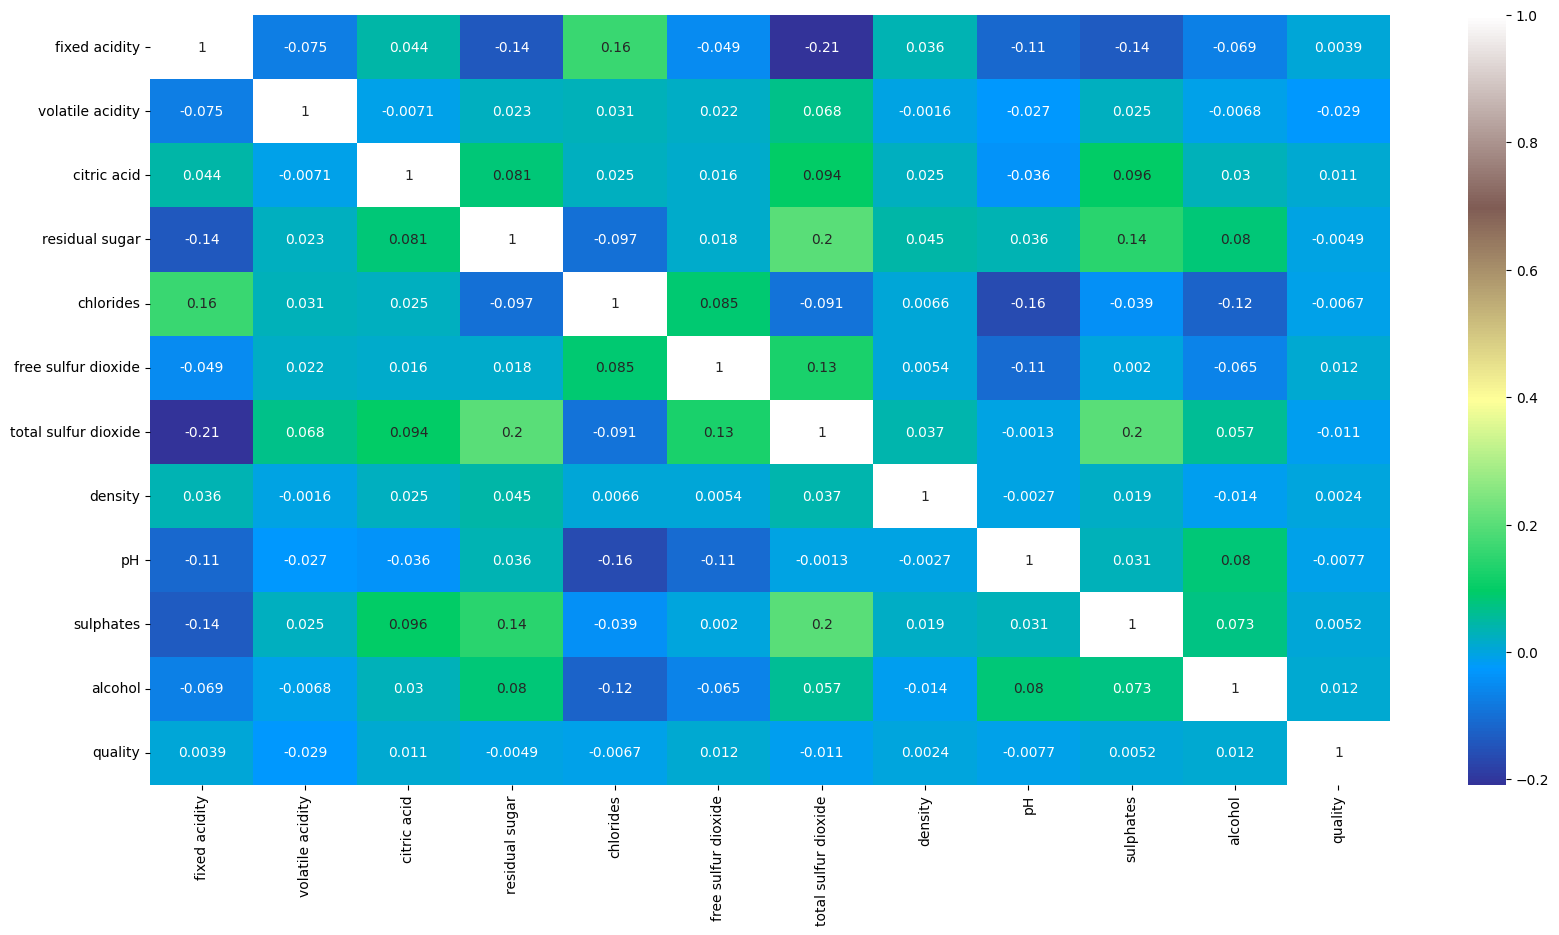

In [21]:
# Check if we need to do Dimensionality reduction
sns.heatmap(wine.corr(),annot=True,cmap='terrain')
figure = plt.gcf()
figure.set_size_inches(20,10)
plt.savefig('figure/heatmap_1_wine.png', format='png', dpi=300)
plt.show()


In [22]:
wine['quality'].unique()
# The results of the quality column are many, but we will focus on the results to confirm whether the wine is good or not, 
# so we will put the data in binary form with 0: unqualified if quality < 6.5 and 1: qualified with the remaining cases.

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [23]:
bins = (2, 6.5, 10)
group_names = ['unqualified', 'qualified']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [24]:
wine['quality'].value_counts()

quality
1    6886
0    3179
Name: count, dtype: int64

***=> The results of the quality column are many, but we will focus on the results to confirm whether the wine is good or not, so we will put the data in binary form with 0: unqualified if quality < 6.5 and 1: qualified with the remaining cases.***

*- Check the outlier using Boxplot*

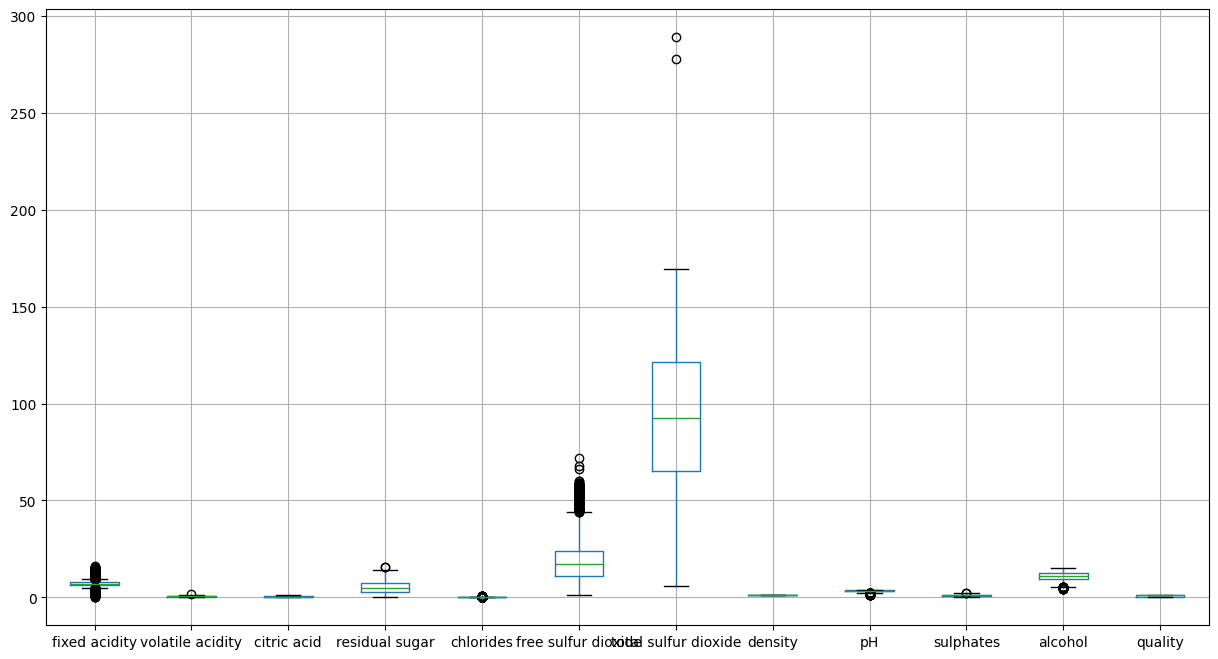

In [25]:
# Check the outlier using Boxplot
wine.boxplot(figsize=(15,8))
plt.show()

*- Note: Do not remove outlier values as it may affect the classification of wine quality.*

In [26]:
wine['free sulfur dioxide'].describe()
# Do not remove outlier values as it may affect the classification of wine quality.

count    10065.000000
mean        17.763636
std          8.568943
min          1.000000
25%         10.800000
50%         17.300000
75%         24.000000
max         72.000000
Name: free sulfur dioxide, dtype: float64

*- Partitioning*

In [27]:
# Partitioning
X = wine.drop('quality',axis=1) #Input data
y = wine['quality']

In [28]:
y

0        1
1        1
2        1
3        1
5        1
        ..
10295    0
10296    1
10297    0
10298    1
10299    1
Name: quality, Length: 10065, dtype: int32

In [29]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4000,0.7000,0.0000,1.9000,0.076,11.0000,34.0000,0.9978,3.51,0.56,9.4
1,7.8000,0.8800,0.0000,2.6000,0.098,25.0000,67.0000,0.9968,3.20,0.68,9.8
2,7.8000,0.7600,0.0400,2.3000,0.092,15.0000,54.0000,0.9970,3.26,0.65,9.8
3,11.2000,0.2800,0.5600,1.9000,0.075,17.0000,60.0000,0.9980,3.16,0.58,9.8
5,7.4000,0.6600,0.0000,1.8000,0.075,13.0000,40.0000,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
10295,11.1436,1.1729,0.5137,0.0604,0.160,27.2874,138.4330,1.0000,2.60,0.60,5.0
10296,4.6159,0.2741,0.5664,5.3574,0.170,10.2142,71.6511,1.0000,2.90,0.70,9.5
10297,4.5387,0.3672,0.3702,3.2047,0.160,1.8341,49.7936,1.0000,2.20,0.50,11.8
10298,7.8399,0.4317,0.5483,2.4241,0.150,25.2930,67.3768,0.9900,3.20,0.40,9.4


*- Standardization of data*

In [30]:
# Standardization of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state = 2)

In [31]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2983,6.94,0.70,0.45,3.06,0.074,26.7,77.1,0.99980,3.50,1.02,11.5
4416,7.90,0.78,0.70,5.05,0.069,6.2,64.8,1.00160,3.66,0.89,10.8
6346,6.63,0.22,0.33,7.38,0.071,23.0,138.6,0.99360,2.95,1.25,13.3
128,8.00,0.59,0.16,1.80,0.065,3.0,16.0,0.99620,3.42,0.92,10.5
9185,7.76,0.43,0.13,4.71,0.064,26.9,136.3,0.99960,2.99,0.89,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1286,7.10,0.16,0.44,2.50,0.068,17.0,31.0,0.99328,3.35,0.54,12.4
2749,6.49,0.70,0.54,1.36,0.066,19.8,97.5,0.99430,3.68,0.83,12.9
6872,6.92,0.98,0.57,4.47,0.052,24.1,128.1,0.99470,3.33,0.84,12.0
2810,7.20,0.86,0.27,8.41,0.060,13.6,103.4,1.00340,3.39,1.04,8.0


In [32]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6447,6.5600,0.680,0.2700,4.25,0.076,22.2000,123.1000,0.9972,3.12,0.81,9.1
9567,6.0500,0.810,0.3600,6.56,0.069,17.0000,70.8000,0.9931,3.51,1.27,12.7
4913,6.9700,0.670,0.3800,4.94,0.052,22.0000,99.5000,0.9939,3.04,1.37,9.3
9887,6.4600,0.800,0.0800,1.69,0.051,16.4000,50.9000,0.9912,2.89,0.89,10.7
1930,7.0700,0.290,0.0200,6.50,0.052,9.5000,88.7000,0.9976,3.05,1.44,12.1
...,...,...,...,...,...,...,...,...,...,...,...
3208,7.9600,0.870,0.6000,2.25,0.092,7.8000,54.5000,0.9920,3.37,1.28,8.0
7306,6.7600,0.280,0.3100,7.41,0.057,22.7000,50.7000,0.9994,3.29,0.73,12.8
6021,6.3400,0.830,0.0500,9.55,0.066,26.3000,126.4000,1.0038,3.34,1.07,8.5
6863,6.4600,0.370,0.6300,6.36,0.055,24.9000,139.4000,0.9981,3.44,1.33,11.4


In [33]:
y_train

2983    0
4416    1
6346    1
128     0
9185    0
       ..
1286    1
2749    1
6872    1
2810    1
7571    1
Name: quality, Length: 8052, dtype: int32

In [34]:
y_test

6447     1
9567     1
4913     0
9887     1
1930     1
        ..
3208     1
7306     0
6021     0
6863     1
10043    0
Name: quality, Length: 2013, dtype: int32

In [35]:
# Looking through the data, we see that the difference between the features is large and the correlation is quite small, 
# so we will apply normalization.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train

array([[-0.23185342,  0.46174767,  0.27988167, ...,  0.69905183,
         0.24859733,  0.36829296],
       [ 0.56388901,  0.80795474,  1.36451472, ...,  1.19623494,
        -0.18604262, -0.03223181],
       [-0.48881192, -1.61549479, -0.2407422 , ..., -1.01001511,
         1.01757568,  1.39821381],
       ...,
       [-0.24843139,  1.67347243,  0.80050553, ...,  0.17079478,
        -0.35321182,  0.65438209],
       [-0.01633985,  1.15416182, -0.50105413, ...,  0.35723844,
         0.31546501, -1.6343309 ],
       [ 0.43955425, -1.13946006, -0.71798074, ..., -0.01564889,
        -1.15562402,  1.11212468]])

In [37]:
X_test

array([[-0.5468348 ,  0.3751959 , -0.50105413, ..., -0.48175805,
        -0.45351335, -1.00493483],
       [-0.96957297,  0.9377824 , -0.11058623, ...,  0.73012578,
         1.08444337,  1.05490686],
       [-0.20698647,  0.33192001, -0.02381559, ..., -0.73034961,
         1.41878178, -0.89049918],
       ...,
       [-0.72919244,  1.02433417, -1.45553122, ...,  0.20186872,
         0.41576653, -1.34824177],
       [-0.62972464, -0.96635652,  1.06081747, ...,  0.51260817,
         1.28504641,  0.31107514],
       [ 3.80305803, -1.95304669, -1.6616115 , ..., -1.78686371,
         0.51606806, -3.29364781]])

***=> Looking through the data, we see that the difference between the features is large and the correlation is quite small,  so we will apply normalization.***

*- Using Principal Components Analysis (Principal Dimensional Reduction)*

In [38]:
# Using Principal Components Analysis (Principal Dimensional Reduction)
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.15190356, 0.11934581, 0.10122911, 0.09010416, 0.08895185,
       0.08333365, 0.08023828, 0.07859005, 0.07433778, 0.06655995,
       0.0654058 ])

In [39]:
pca.explained_variance_ratio_

array([0.15190356, 0.11934581, 0.10122911, 0.09010416, 0.08895185,
       0.08333365, 0.08023828, 0.07859005, 0.07433778, 0.06655995,
       0.0654058 ])

In [40]:
sum(pca.explained_variance_ratio_)

1.0

In [41]:
pca

PCA(n_components=0.95)

In [42]:
X_train

array([[-0.09826182,  0.07546425,  0.2219613 , ..., -0.14724206,
        -0.0728042 ,  0.64686747],
       [ 0.14237806, -0.99700314, -1.49874701, ...,  0.01462973,
         0.09801966,  0.23857132],
       [-1.69957494,  0.37035801, -0.25059423, ..., -0.1323334 ,
        -0.06069302, -0.30174381],
       ...,
       [-1.17506772,  0.36614711,  0.76685471, ..., -0.59967221,
        -0.49701527, -0.28642761],
       [-0.75984821,  0.28463955,  0.13300303, ...,  0.05511984,
        -0.7203101 ,  0.3201394 ],
       [ 0.19570957, -2.02204542, -0.73859308, ...,  0.74545072,
         0.05451002,  0.41381809]])

**3. Apply algorithms to problems**

***3.1. Logistics regression***

In [43]:
# Logistics regression
lgt = LogisticRegression(solver='lbfgs', max_iter=3000)
lgt.fit(X_train,y_train)
y_predict1 = lgt.predict(X_test)
acc = accuracy_score(y_test, y_predict1)
prec = precision_score(y_test, y_predict1, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict1, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict1, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict1)
results = pd.DataFrame([['Logistic Regression', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model   Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  68.007948   0.463644  0.680079  0.551383


***3.2. SVM (Linear) - SVC***

In [44]:
# SVM (Linear) - SVC
svc = SVC(random_state = 0, kernel = 'linear')
svc.fit(X_train,y_train)
y_predict2 = svc.predict(X_test)
acc = accuracy_score(y_test, y_predict2)
prec = precision_score(y_test, y_predict2, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict2, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict2, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict2)
model_results = pd.DataFrame([['SVM (Linear)', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                 Model   Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  68.007948   0.463644  0.680079  0.551383
1         SVM (Linear)  68.107303   0.463860  0.681073  0.551862


***3.3. SVM (RBF) - SVC***

In [45]:
# SVM (RBF) - SVC
svc_rbf = SVC(random_state = 0, kernel = 'rbf')
svc_rbf.fit(X_train,y_train)
y_predict6 = svc_rbf.predict(X_test)
acc = accuracy_score(y_test, y_predict6)
prec = precision_score(y_test, y_predict6, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict6, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict6, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict6)
model_results = pd.DataFrame([['SVM (RBF)', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                 Model   Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  68.007948   0.463644  0.680079  0.551383
1         SVM (Linear)  68.107303   0.463860  0.681073  0.551862
2            SVM (RBF)  68.156980   0.783018  0.681570  0.553017


***3.4. KNeighbors Classifier***

In [46]:
# KNeighbors Classifier
Knn = KNeighborsClassifier()
Knn.fit(X_train,y_train)
y_predict3 = Knn.predict(X_test)
acc = accuracy_score(y_test, y_predict3)
prec = precision_score(y_test, y_predict3, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict3, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict3, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict3)
model_results = pd.DataFrame([['KNeighborsClassifier', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                  Model   Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  68.007948   0.463644  0.680079  0.551383
1          SVM (Linear)  68.107303   0.463860  0.681073  0.551862
2             SVM (RBF)  68.156980   0.783018  0.681570  0.553017
3  KNeighborsClassifier  61.748634   0.579089  0.617486  0.591195


***3.5. Decision Tree Classifier***

In [47]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, splitter='best')
dtc.fit(X_train,y_train)
y_predict4 = dtc.predict(X_test)
acc = accuracy_score(y_test, y_predict4)
prec = precision_score(y_test, y_predict4, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict4, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict4, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict4)
model_results = pd.DataFrame([['DecisionTree', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)


                  Model   Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  68.007948   0.463644  0.680079  0.551383
1          SVM (Linear)  68.107303   0.463860  0.681073  0.551862
2             SVM (RBF)  68.156980   0.783018  0.681570  0.553017
3  KNeighborsClassifier  61.748634   0.579089  0.617486  0.591195
4          DecisionTree  57.327372   0.572743  0.573274  0.573007


***3.6. Random Forest Classifier***

In [48]:
# Random Forest Classifier

rfc = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
rfc.fit(X_train,y_train)
y_predict5 = rfc.predict(X_test)
acc = accuracy_score(y_test, y_predict5)
prec = precision_score(y_test, y_predict5, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict5, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict5, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict5)
model_results = pd.DataFrame([['RandomForest', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                  Model   Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  68.007948   0.463644  0.680079  0.551383
1          SVM (Linear)  68.107303   0.463860  0.681073  0.551862
2             SVM (RBF)  68.156980   0.783018  0.681570  0.553017
3  KNeighborsClassifier  61.748634   0.579089  0.617486  0.591195
4          DecisionTree  57.327372   0.572743  0.573274  0.573007
5          RandomForest  67.610532   0.599778  0.676105  0.570958


In [49]:
print('Logistic Regression:')
print(classification_report(y_test, y_predict1))
print('SVM (Linear):')
print(classification_report(y_test, y_predict2))
print('SVM (RBF):')
print(classification_report(y_test, y_predict3))
print('KNeighborsClassifier:')
print(classification_report(y_test, y_predict4))
print('DecisionTree:')
print(classification_report(y_test, y_predict5))
print('RandomForest:')
print(classification_report(y_test, y_predict6))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       642
           1       0.68      1.00      0.81      1371

    accuracy                           0.68      2013
   macro avg       0.34      0.50      0.40      2013
weighted avg       0.46      0.68      0.55      2013

SVM (Linear):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       642
           1       0.68      1.00      0.81      1371

    accuracy                           0.68      2013
   macro avg       0.34      0.50      0.41      2013
weighted avg       0.46      0.68      0.55      2013

SVM (RBF):
              precision    recall  f1-score   support

           0       0.35      0.22      0.27       642
           1       0.69      0.80      0.74      1371

    accuracy                           0.62      2013
   macro avg       0.52      0.51      0.51      2013
weighted avg       0.58     

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***=> So best current model is SVM (RBF)***

*Performs Grid Search Cross-Validation to find the optimal parameters for the SVM model with the kernel 'rbf'.*

*Note: The parameters that need to be optimized include:*
+ C: standard tuning parameter
+ gamma: kernel influence parameter

In [50]:
svm = SVC(kernel = 'rbf')

parameter = param_grid = {
    'C': [0.1, 1, 10, 100],        
    'gamma': [0.001,0.01, 0.1, 1],    
    'kernel': ['rbf']           
}

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)

# Set up the GridSearchCV
grid_search_cv_svm = GridSearchCV(svm, param_grid=param_grid, scoring='accuracy', cv=cv, return_train_score=True, refit=True, verbose=2)

In [51]:
grid_search_cv_svm.fit(X_train,y_train)

Fitting 15 folds for each of 16 candidates, totalling 240 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.8s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.8s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.4s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.8s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END .....................C=0.1, gamma=0.0

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=100),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [52]:
grid_search_cv_svm.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

*Save model*

In [53]:
# Save model
joblib.dump(grid_search_cv_svm,'figure/SVM_RBF_gridsearch.pkl')

['figure/SVM_RBF_gridsearch.pkl']

*Load model*

In [54]:
# Load model
print(f'Best: {grid_search_cv_svm.best_score_:.3f} using {grid_search_cv_svm.best_params_}')
means = grid_search_cv_svm.cv_results_['mean_test_score']
stds = grid_search_cv_svm.cv_results_['std_test_score']
params = grid_search_cv_svm.cv_results_['params']

# Print the results
for mean,stdev,params in zip(means, stds, params):
    print(f"{mean:.3f}({stdev:.3f}) with: {params}")
print("Training score: ",grid_search_cv_svm.score(X_train,y_train))
print("Testing score: ",grid_search_cv_svm.score(X_test,y_test))

Best: 0.687 using {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.685(0.001) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.687(0.002) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.685(0.001) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.663(0.007) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.667(0.005) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.685(0.000) with: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.684(0.002) with: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.612(0.009) with: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.666(0.005) with: {'C': 100, 'gamm

*Predict test set results and calculate accuracy*

In [55]:
# Predict test set results and calculate accuracy

best_svm_model = SVC(C=1, gamma=1, kernel='rbf')

best_svm_model.fit(X_train, y_train)

predictions = best_svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.674615002483855


*Test model with new data (winequality_train_test.csv)*

In [57]:
# Test model with new data (winequality_train_test.csv)
test_data = pd.read_csv('./winequality_train_test.csv')
test = pca.transform(scaler.transform(test_data))
p1 = best_svm_model.predict(test)
for i, prediction in enumerate(p1):
    if prediction == 1:
        print(f'Row {i + 1}: Good quality wine')
    else:
        print(f'Row {i + 1}: Bad quality wine')

Row 1: Good quality wine
Row 2: Good quality wine
Row 3: Good quality wine
Row 4: Bad quality wine
